In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = data.drop('Purchased', axis=1)
y = data['Purchased']

In [5]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
if categorical_cols:
    transformer = ColumnTransformer(
        transformers=[
            ("OneHot", OneHotEncoder(), categorical_cols)],
        remainder='passthrough')
    X = pd.DataFrame(transformer.fit_transform(X))
else:
    pass
X

,0,1,2,3,4
0,0.0,1.0,15624510.0,19.0,19000.0
1,0.0,1.0,15810944.0,35.0,20000.0
2,1.0,0.0,15668575.0,26.0,43000.0
3,1.0,0.0,15603246.0,27.0,57000.0
4,0.0,1.0,15804002.0,19.0,76000.0
...,...,...,...,...,...
395,1.0,0.0,15691863.0,46.0,41000.0
396,0.0,1.0,15706071.0,51.0,23000.0
397,1.0,0.0,15654296.0,50.0,20000.0
398,0.0,1.0,15755018.0,36.0,33000.0


In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.02020406,  1.02020406, -0.93657932, -1.78179743, -1.49004624],
       [-1.02020406,  1.02020406,  1.66838653, -0.25358736, -1.46068138],
       [ 0.98019606, -0.98019606, -0.32087714, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606, -0.98019606, -0.52039175,  1.17910958, -1.46068138],
       [-1.02020406,  1.02020406,  0.88695546, -0.15807423, -1.07893824],
       [ 0.98019606, -0.98019606, -1.36231017,  1.08359645, -0.99084367]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [19]:
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[50,  2],
       [ 7, 21]], dtype=int64)

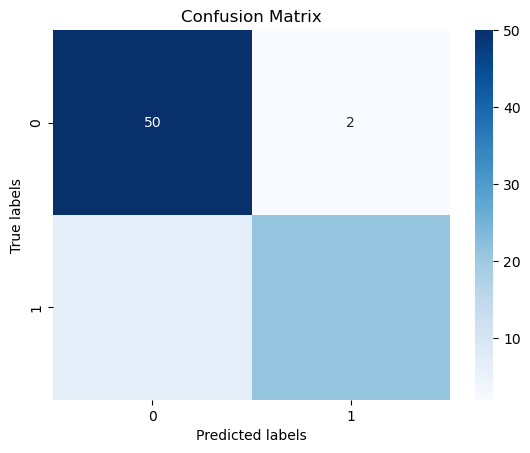

In [21]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.8897406559877956
Recall: 0.8875
Accuracy: 0.8875
